# LIST2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import imageio

Below is the code to simulate Conway's Game of life. In my approach, instead of checking the indexing conditions on the boundry of the matrix, I've added padding of 2s, which I remove when checking cell's neighborhood. The function takes in the initial config and limit of iterations.

In [ ]:
def conway_sim(config, limit):
    M=np.pad(config,(1,1),'constant',constant_values=2)
    height=len(M[:,0])
    width=len(M[0,:])
    generations=[M.copy()]
    
    for _ in range(limit):
        changes=[]
        for i in range(1,height-1):
            for j in range(1,width-1):
                temp_nbhd = np.array([M[i+a,j+b] for a in [-1,0,1] for b in [-1,0,1] if (a!=0 or b!=0)])
                nbhd = np.delete(temp_nbhd, np.where(temp_nbhd == 2))

                if M[i,j]==1:
                    if sum(nbhd)!=2 and sum(nbhd)!=3:
                        changes.append((i,j,0))
                elif M[i,j]==0:
                    if sum(nbhd)==3:
                        changes.append((i,j,1))
        for c in changes:
            M[c[0],c[1]]=c[2]
        
        generations.append(M.copy())
        
    return generations
                


Function below is resposible for generating gifs of the simulation.

In [ ]:
def animator(sim,filename):
    count=0
    for i in range(len(sim)):
        count+=1
        plt.imshow(sim[i])
        plt.savefig(f'LIST2/images/frame_{i}.png', 
                    transparent = False,  
                    facecolor = 'white'
                )
    frames = []
    for t in range(count):
        image = imageio.v2.imread(f'LIST2/images/frame_{t}.png')
        frames.append(image)

    imageio.mimsave(f'LIST2/{filename}.gif', # output gif
                    frames,
                    format='GIF',          
                    duration=500,)         # optional: frames per second

anim_from_file function, takes in name of the gif to be generated, the number of iterations of the simulation and config name in .txt format, then it produces the .gif file of said simulation. 

In [ ]:
def anim_from_file(filename,limit,config):
    A=np.loadtxt(config)
    sim=conway_sim(A,limit)
    animator(sim,filename)


Here is very basic example of the function use.

In [ ]:
#anim_from_file('conway_rotator',10,'config_rotator.txt')

Below are examples of interesting patterns.

In [ ]:
A=np.array([[0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,1,1,1,0,0,0,0],
            [0,0,0,0,1,0,1,0,0,0,0],                       
            [0,0,0,0,1,1,1,0,0,0,0],
            [0,0,0,0,1,1,1,0,0,0,0],
            [0,0,0,0,1,1,1,0,0,0,0],
            [0,0,0,0,1,1,1,0,0,0,0],
            [0,0,0,0,1,0,1,0,0,0,0],
            [0,0,0,0,1,1,1,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],                       
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0]])
#np.savetxt('config_pen_dec.txt',A)


The figure below shows a Penta-decathlon, which is an oscilator with a period of 15 iterations.

In [ ]:
#anim_from_file('conway_pen_dec',30,'config_pen_dec.txt')

Below is the implementation of the conway's game of life, but in this case I decided to have periodic boundry conditions, to show behaviour of different patterns.

In [ ]:
def conway_sim_periodic(config, limit):
    M=config
    height=len(M[:,0])
    width=len(M[0,:])
    generations=[M.copy()]
    
    for _ in range(limit):
        changes=[]
        for i in range(height):
            for j in range(width):
                if (i+1<height and j+1<width):
                    nbhd = np.array([M[i+a,j+b] for a in [-1,0,1] for b in [-1,0,1] if (a!=0 or b!=0)])                    
                    if M[i,j]==1:
                        if sum(nbhd)!=2 and sum(nbhd)!=3:
                            changes.append((i,j,0))
                    elif M[i,j]==0:
                        if sum(nbhd)==3:
                            changes.append((i,j,1))
                elif (i+1>=height and j+1<width):
                    nbhd = np.array([M[i+a,j+b] for a in [-1,0,-height+1] for b in [-1,0,1] if (a!=0 or b!=0)])                    
                    if M[i,j]==1:
                        if sum(nbhd)!=2 and sum(nbhd)!=3:
                            changes.append((i,j,0))
                    elif M[i,j]==0:
                        if sum(nbhd)==3:
                            changes.append((i,j,1))
                elif (i+1<height and j+1>=width):
                    nbhd = np.array([M[i+a,j+b] for a in [-1,0,1] for b in [-1,0,-width+1] if (a!=0 or b!=0)])                    
                    if M[i,j]==1:
                        if sum(nbhd)!=2 and sum(nbhd)!=3:
                            changes.append((i,j,0))
                    elif M[i,j]==0:
                        if sum(nbhd)==3:
                            changes.append((i,j,1))
                elif (i+1>=height and j+1>=width):
                    nbhd = np.array([M[i+a,j+b] for a in [-1,0,-height+1] for b in [-1,0,-width+1] if (a!=0 or b!=0)])                    
                    if M[i,j]==1:
                        if sum(nbhd)!=2 and sum(nbhd)!=3:
                            changes.append((i,j,0))
                    elif M[i,j]==0:
                        if sum(nbhd)==3:
                            changes.append((i,j,1))
        for c in changes:
            M[c[0],c[1]]=c[2]
        
        generations.append(M.copy())
        
    return generations

In [ ]:
def anim_from_file_periodic(filename,limit,config):
    A=np.loadtxt(config)
    sim=conway_sim_periodic(A,limit)
    animator(sim,filename)

Below are examples of patterns, that look better when periodic boundy conditions are present. 

In [ ]:
A=np.array([[0,1,0,0,0,0,1,0,0,0,0],
            [0,0,1,0,0,0,0,1,0,0,0],
            [1,1,1,0,0,1,1,1,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,1,0,0,0,0,1,0,0,0,0],
            [0,0,1,0,0,0,0,1,0,0,0],
            [1,1,1,0,0,1,1,1,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0]])
#np.savetxt('config_gliders.txt',A)

Here is the simulation of several gliders moving through the grid.

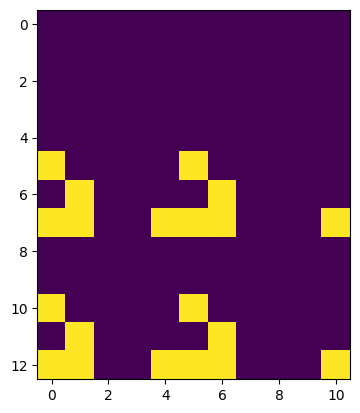

In [ ]:
#anim_from_file_periodic('conway_gliders',40,'config_gliders.txt')

In [ ]:
A=np.array([[1,0,1,0,0,0,1,0,1,0,0,0,0],
            [0,0,0,1,0,0,0,0,0,1,0,0,0],
            [0,0,0,1,0,0,0,0,0,1,0,0,0],
            [1,0,0,1,0,0,1,0,0,1,0,0,0],
            [0,1,1,1,0,0,0,1,1,1,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0]])
#np.savetxt('config_spaceships.txt',A)

And here is the simulation of 2 space ships moving through the grid.

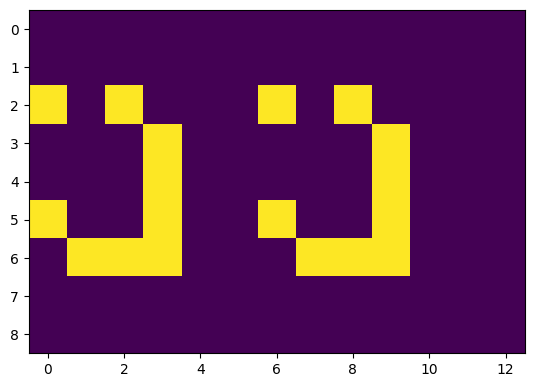

In [ ]:
#anim_from_file_periodic('conway_spaceships',40,'config_spaceships.txt')

The excercise was really fun to create and play around with. Even when I've made a mistake while programming the resulting patterns, were nice to look at, even though they weren't the results I was expecting. There is a huge potential to play around with different rules or topologies and I will definitely come back to this project some day in the future to play with it.  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3ec5c87c-f518-4cc9-8f2b-953db59a48eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>